In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [4]:
data = pd.read_csv('../data/fertify_data.csv')
data

,temperature,humidity,moisture,soil type,crop type,nitrogen,potassium,phosphorous,fertilizer name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


-->INFORMATIONS SUR NOTRE DATASET

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   temperature      99 non-null     int64 
 1   humidity         99 non-null     int64 
 2   moisture         99 non-null     int64 
 3   soil type        99 non-null     object
 4   crop type        99 non-null     object
 5   nitrogen         99 non-null     int64 
 6   potassium        99 non-null     int64 
 7   phosphorous      99 non-null     int64 
 8   fertilizer name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


PREPROSSECING

In [6]:
y = data['fertilizer name'].copy()
X = data.drop('fertilizer name', axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
X_train


,temperature,humidity,moisture,soil type,crop type,nitrogen,potassium,phosphorous
36,30,60,61,Loamy,Cotton,8,10,31
52,28,54,38,Clayey,Pulses,40,0,0
74,33,64,31,Red,Ground Nuts,13,0,39
70,26,52,39,Clayey,Pulses,21,0,23
39,29,58,34,Sandy,Millets,15,0,37
...,...,...,...,...,...,...,...,...
75,29,58,42,Clayey,Paddy,9,10,22
9,29,58,33,Black,Oil seeds,9,7,30
72,34,65,48,Loamy,Wheat,23,0,19
12,25,50,65,Loamy,Cotton,36,0,0


In [7]:
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('nominal', nominal_transformer, ['soil type', 'crop type'])
], remainder='passthrough')

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

In [8]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['soil type',
                                                   'crop type'])])),
                ('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [9]:
print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

Test Accuracy: 86.67%


In [10]:
y_pred = model.predict(X_test)

clr = classification_report(y_test, y_pred)
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

    10-26-26       0.50      0.33      0.40         3
    14-35-14       0.71      1.00      0.83         5
    17-17-17       0.50      0.33      0.40         3
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         7

    accuracy                           0.87        30
   macro avg       0.82      0.81      0.80        30
weighted avg       0.85      0.87      0.85        30



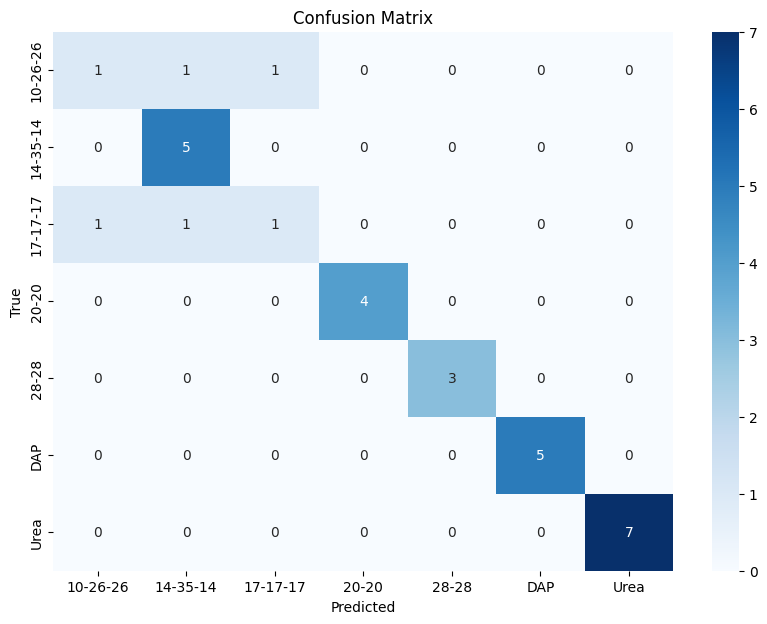

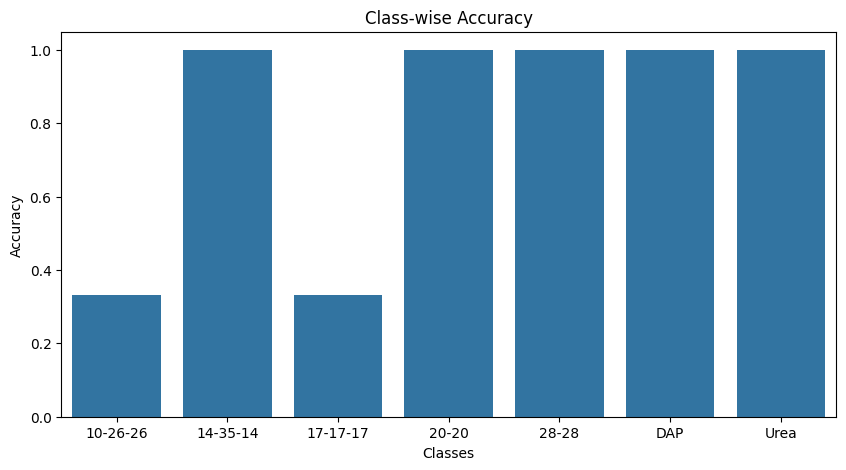

The recommended fertilizer is: Urea


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict and compute confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot class-wise accuracy
class_accuracies = np.diag(cm) / np.sum(cm, axis=1)
plt.figure(figsize=(10, 5))
sns.barplot(x=model.classes_, y=class_accuracies)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.show()


# Function to predict fertilizer
def predict_fertilizer(temperature, humidity, moisture, soil_type, crop_type, nitrogen, potassium, phosphorous):
    input_data = pd.DataFrame({
        'temperature': [temperature],
        'humidity': [humidity],
        'moisture': [moisture],
        'soil type': [soil_type],
        'crop type': [crop_type],
        'nitrogen': [nitrogen],
        'potassium': [potassium],
        'phosphorous': [phosphorous]
    })
    
    # Make prediction
    prediction = model.predict(input_data)
    return prediction[0]

# Example usage
temperature = float(input("Enter temperature: "))
humidity = float(input("Enter humidity: "))
moisture = float(input("Enter moisture: "))
soil_type = input("Enter soil type (e.g., Sandy, Loamy, Black, Clayey, Red): ")
crop_type = input("Enter crop type (e.g., Maize, Sugarcane, Cotton, etc.): ")
nitrogen = float(input("Enter nitrogen content: "))
potassium = float(input("Enter potassium content: "))
phosphorous = float(input("Enter phosphorous content: "))

fertilizer = predict_fertilizer(temperature, humidity, moisture, soil_type, crop_type, nitrogen, potassium, phosphorous)
print(f"The recommended fertilizer is: {fertilizer}")



In [12]:
#saving the model parts
import joblib

joblib.dump(model,'../models/Fertify.pkl')




['../models/Fertify.pkl']

In [13]:
input_data = pd.DataFrame({
        'temperature': [1],
        'humidity':  [2],
        'moisture': [6],
        'soil type': 'Sandy',
        'crop type': 'Maize',
        'nitrogen': [0],
        'potassium': [2],
        'phosphorous':  [0]
    })
print(input_data)
prediction = model.predict(input_data)
print(prediction)

   temperature  humidity  moisture soil type crop type  nitrogen  potassium  \
0            1         2         6     Sandy     Maize         0          2   

   phosphorous  
0            0  
['Urea']


In [14]:
print(data['crop type'].unique())

['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']
